In [23]:
import pandas as pd
import cbsodata
import matplotlib.pyplot as plt
import numpy as np
import functools as ft
from datetime import datetime

todayDate = datetime.today().strftime('%Y_%m_%d')
pd.set_option('display.max_columns', 40)

In [24]:
###################################
# https://cbsodata.readthedocs.io/en/latest/readme_link.html

# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.cpb.nl/sites/default/files/publicaties/download/cpb-technical-background-document-bvar-models-used-cpb.pdf
###################################

#### GDP
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/84105NED/table?ts=1706684088769
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/84087NED/table?ts=1696490590802
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/85879NED/table?ts=1696490590802

In [25]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

C:\Users\jpark\AppData\Local\Temp\ipykernel_6968\4280703298.py:18: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data.index = pd.date_range(start = start_date, periods = data.shape[0], freq = "Q").to_period('Q')
C:\Users\jpark\AppData\Local\Temp\ipykernel_6968\4280703298.py:46: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  all_data.index = pd.date_range(start=start_date, periods = all_data.shape[0], freq="Q").to_period('Q')


(119, 152)


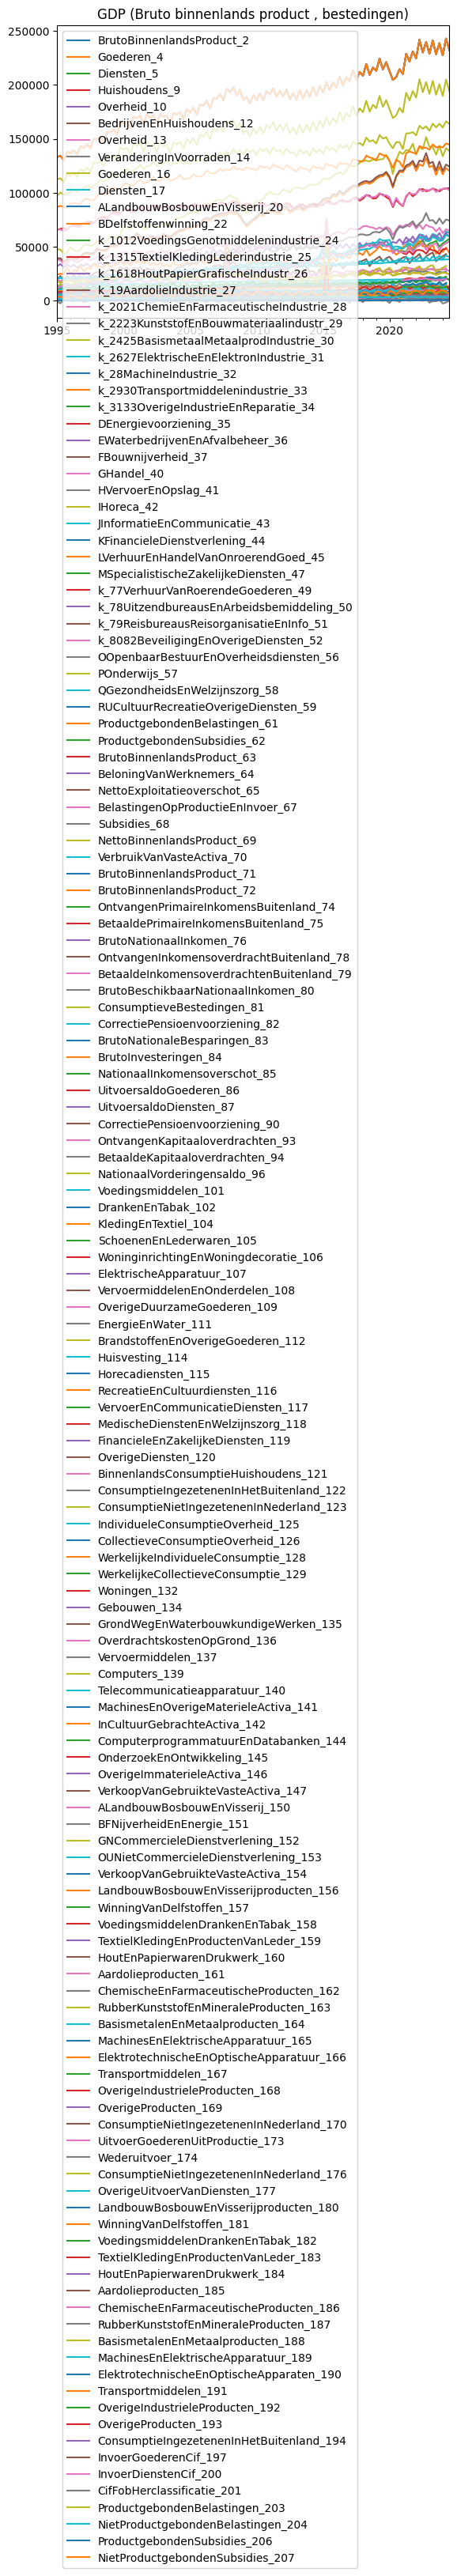

In [26]:
def macro_data_cbs(identifier, verbose = False):
    start_date = '01/01/1995'

    if verbose:
        info = cbsodata.get_info(identifier)
        print(info)
        tables = pd.DataFrame(cbsodata.get_table_list())

    # get data
    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        data.to_csv(output + "unprocessed_data.csv")
        print(data.Perioden)

    data = data[data["SoortGegevens"] == 'Prijsniveau 2021']
    data = data[data['Perioden'].str.contains('kwartaal')]
    data.index = pd.date_range(start = start_date, periods = data.shape[0], freq = "Q").to_period('Q')

    all_data = data
    # remove ID column
    all_data.drop(columns = ['ID','SoortGegevens','Perioden'], inplace = True)
    # remove Totaal columns
    all_data = all_data.loc[:, ~all_data.columns.str.contains('Totaal')]
    # remove Saldo columns
    all_data = all_data.loc[:, ~all_data.columns.str.contains('Saldo')]
    # remove CifFobCorrectie columns
    all_data = all_data.loc[:, ~all_data.columns.str.contains('CifFobCorrectie')]

    # all_data.rename(columns = { 'BrutoBinnenlandsProduct_2': 'gdp_total', 
    #                             'Goederen_4': 'imports_goods',
    #                             'Diensten_5': 'imports_services',
    #                             'Huishoudens_9': 'household_cons',
    #                             'Overheid_10': 'gov_consumption',
    #                             'Totaal_11': 'total_investments',
    #                             'BedrijvenEnHuishoudens_12': 'business_and_household_investments',
    #                             'Overheid_13': 'gov_investments',
    #                             'VeranderingInVoorraden_14': 'change_supply',
    #                             'Goederen_16': 'exports_goods',
    #                             'Diensten_17': 'exports_services'}, inplace = True)


    ######################
    # Set data index
    ######################
    all_data.index = pd.date_range(start=start_date, periods = all_data.shape[0], freq="Q").to_period('Q')
    # this adds one day, so that we can go to the first of a month
    all_data.index = pd.PeriodIndex(all_data.index, freq='Q').to_timestamp() #+ datetime.timedelta(days=1) #pd.offsets.QuarterEnd()

    print(all_data.shape)

    all_data.to_csv("tmp2.csv")

    return all_data


NLD_basic_macro_data = macro_data_cbs(identifier = '85879NED', verbose = False)
NLD_basic_macro_data.to_csv(output + "cbs_basic_macro_NOT_SEASONCORRECTED_qt.csv")

NLD_basic_macro_data.plot()
plt.title('GDP (Bruto binnenlands product , bestedingen)')
plt.savefig(figures + "NLD_basic_macro_data.png")
plt.show()


In [37]:
build_up = NLD_basic_macro_data.loc[["1995-01-01"], ["BrutoBinnenlandsProduct_2", "Goederen_4", "Diensten_5","Huishoudens_9", "Overheid_10", 
                                                     "BedrijvenEnHuishoudens_12", "Overheid_13", "VeranderingInVoorraden_14", "Goederen_16", "Diensten_17"]]


-build_up['Goederen_4'] - build_up['Diensten_5'] + build_up['Huishoudens_9'] + build_up['Overheid_10'] + build_up['BedrijvenEnHuishoudens_12'] + build_up['Overheid_13'] + build_up['VeranderingInVoorraden_14'] + build_up['Goederen_16'] + build_up['Diensten_17']



1995-01-01    132733.0
dtype: float64

In [29]:
NLD_basic_macro_data.head()

,BrutoBinnenlandsProduct_2,Goederen_4,Diensten_5,Huishoudens_9,Overheid_10,BedrijvenEnHuishoudens_12,Overheid_13,VeranderingInVoorraden_14,Goederen_16,Diensten_17,ALandbouwBosbouwEnVisserij_20,BDelfstoffenwinning_22,k_1012VoedingsGenotmiddelenindustrie_24,k_1315TextielKledingLederindustrie_25,k_1618HoutPapierGrafischeIndustr_26,k_19AardolieIndustrie_27,k_2021ChemieEnFarmaceutischeIndustrie_28,k_2223KunststofEnBouwmateriaalindustr_29,k_2425BasismetaalMetaalprodIndustrie_30,k_2627ElektrischeEnElektronIndustrie_31,...,VoedingsmiddelenDrankenEnTabak_182,TextielKledingEnProductenVanLeder_183,HoutEnPapierwarenDrukwerk_184,Aardolieproducten_185,ChemischeEnFarmaceutischeProducten_186,RubberKunststofEnMineraleProducten_187,BasismetalenEnMetaalproducten_188,MachinesEnElektrischeApparatuur_189,ElektrotechnischeEnOptischeApparaten_190,Transportmiddelen_191,OverigeIndustrieleProducten_192,OverigeProducten_193,ConsumptieIngezetenenInHetBuitenland_194,InvoerGoederenCif_197,InvoerDienstenCif_200,CifFobHerclassificatie_201,ProductgebondenBelastingen_203,NietProductgebondenBelastingen_204,ProductgebondenSubsidies_206,NietProductgebondenSubsidies_207
1995-01-01,133228.0,38353.0,11844.0,65643.0,32016.0,20599.0,4081.0,-922.0,47684.0,13829.0,2741.0,11710.0,2674.0,443.0,1174.0,174.0,1751.0,1160.0,2033.0,857.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1651.0,39208.0,11235.0,548.0,18016.0,1582.0,133.0,4033.0
1995-04-01,134022.0,38301.0,13655.0,66558.0,33852.0,22682.0,4622.0,-2554.0,47147.0,14215.0,2517.0,6145.0,3498.0,383.0,1274.0,51.0,1492.0,1248.0,1641.0,853.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2799.0,39187.0,13050.0,567.0,16373.0,1516.0,125.0,3530.0
1995-07-01,130344.0,35587.0,14769.0,67305.0,30831.0,18893.0,4223.0,1287.0,43512.0,15128.0,2577.0,4917.0,4240.0,366.0,1058.0,-42.0,1535.0,1066.0,1893.0,1002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5172.0,36347.0,14283.0,460.0,17909.0,1906.0,131.0,2170.0
1995-10-01,137998.0,37241.0,15178.0,65729.0,33486.0,22828.0,5808.0,2127.0,44595.0,16373.0,2263.0,9833.0,3831.0,347.0,1293.0,460.0,1604.0,1128.0,1781.0,811.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2269.0,37968.0,14717.0,441.0,18417.0,2935.0,118.0,1396.0
1996-01-01,136390.0,40279.0,12775.0,69101.0,31389.0,20666.0,4002.0,-469.0,49602.0,14753.0,2534.0,14958.0,2730.0,404.0,1109.0,153.0,1742.0,1008.0,1955.0,880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1838.0,41151.0,12188.0,537.0,18735.0,1793.0,109.0,5095.0
